In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [35]:
# from pandas_gbq import read_gbq
# merged_data = read_gbq(f"""


# SELECT *
# FROM capstone-398012.capstone_final.CRI_Compustat_Merged_785k

# """,project_id='capstone-398012', dialect='standard')

# Specify the path to your pickle file
file_path = "../../../dataset/cri_compustat_merged_v8.pkl"

# Open the pickle file for reading
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    df = pickle.load(file)

In [36]:
print(df.columns.tolist())

print(len(df. index))

['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic', 'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets', 'asset_turnover', 'inventory_turnover', 'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding', 'working_capital_turnover', 'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin', 'debt_service_coverage_ratio', 'interest_coverage_ratio']
1179414


In [37]:
print(df.shape)
df.sort_values(by='date', inplace=True)
df['Duration'] = df['Duration'].dt.total_seconds() / (24 * 60 * 60)
df.head()

(1179414, 52)


,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,42404,2000.0,1,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,...,197946.597222,0.000000,-5.000000,-0.000000,1.000000,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
4660,38318,2000.0,1,0.089239,0.011089,3.716702,1.502089,1.217818,0.072036,0.008587,...,89.520382,0.160714,175.431034,0.000000,1.000000,4.503131e+01,-4.468629e+01,-4.203689e+01,-149041.103448,-0.776226
4659,30919,2000.0,1,0.089239,0.011089,2.721204,0.118883,2.260250,-0.057290,0.011613,...,339.913431,0.173655,46.875000,0.000000,1.000000,5.538300e+01,-2.503673e+01,-2.228751e+01,-0.369007,-2.958753
4658,28612,2000.0,1,0.089239,0.011089,2.951064,-0.037748,0.603877,0.020419,0.008892,...,536.381872,0.950565,-26.893939,-1.954545,2.954545,3.994056e+01,-6.092125e+01,-5.358098e+01,-0.604898,-0.290000
4657,37803,2000.0,1,0.089239,0.011089,2.692160,1.016634,0.976345,0.781513,0.011998,...,490.664365,0.374972,178.125000,0.000000,1.000000,3.530126e+01,-6.099560e+01,-5.861284e+01,-1.081539,2.392157


In [38]:
df.describe()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
count,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,...,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06,1.179414e+06
mean,3.926448e+04,2.009191e+03,6.494978e+00,5.266388e-02,-3.969801e-03,4.187220e+00,-3.362182e-02,6.569446e-01,-1.301089e-02,-4.488696e-03,...,-2.090283e+04,1.025580e+00,5.820594e+01,2.284979e-01,-1.681258e+00,-5.434584e+04,-8.748241e+05,-8.601627e+05,-2.207294e+04,-1.861652e+04
std,1.142709e+04,6.405301e+00,3.421920e+00,1.789024e-01,7.662752e-03,2.982607e+00,1.225406e+00,8.330094e-01,2.913404e-01,3.671106e-02,...,1.767261e+06,3.072200e+02,4.086347e+02,3.225246e+00,5.341159e+01,5.299333e+05,4.286064e+06,4.247226e+06,5.290048e+04,7.214562e+04
min,2.204300e+04,2.000000e+03,1.000000e+00,-5.455788e-01,-1.209741e-02,-1.113511e+00,-3.534109e+01,-4.156714e+00,-2.559415e+00,-1.324832e+00,...,-2.711250e+07,-6.403037e+04,-6.666667e+04,-7.477360e+02,-1.149000e+03,-5.251700e+06,-2.189250e+07,-2.185540e+07,-1.490411e+05,-2.972110e+05
25%,3.044100e+04,2.004000e+03,4.000000e+00,-5.400957e-02,-1.095465e-02,2.164919e+00,-6.074802e-01,0.000000e+00,-8.405940e-02,-3.437114e-03,...,0.000000e+00,1.221263e-02,-1.094370e+01,0.000000e+00,8.000000e-01,1.947397e+01,-7.841401e+01,-7.343351e+01,-3.970295e+00,2.721792e-01
50%,3.734800e+04,2.008000e+03,6.000000e+00,8.364726e-02,-6.738806e-03,3.633913e+00,-1.436143e-02,5.444013e-01,0.000000e+00,1.764264e-03,...,1.035616e+02,5.708613e-01,4.335938e+01,0.000000e+00,1.000000e+00,3.545687e+01,-5.425478e+01,-4.814792e+01,-6.133871e-01,4.171909e+00
75%,4.606600e+04,2.014000e+03,9.000000e+00,1.489924e-01,1.361954e-03,5.597363e+00,5.755450e-01,1.116815e+00,6.433769e-02,5.552871e-03,...,2.430317e+02,1.451386e+00,8.984211e+01,2.000000e-01,1.000000e+00,5.474312e+01,-2.552508e+01,-1.492728e+01,-9.607183e-02,1.306043e+01
max,1.270280e+05,2.023000e+03,1.200000e+01,7.133805e-01,1.386113e-02,1.146545e+02,1.493372e+01,4.787727e+00,2.683886e+00,2.160935e-01,...,9.736054e+08,1.096772e+05,4.137500e+04,7.650000e+02,7.487360e+02,8.017000e+05,1.603300e+06,1.582700e+06,5.576667e+03,1.326735e+05


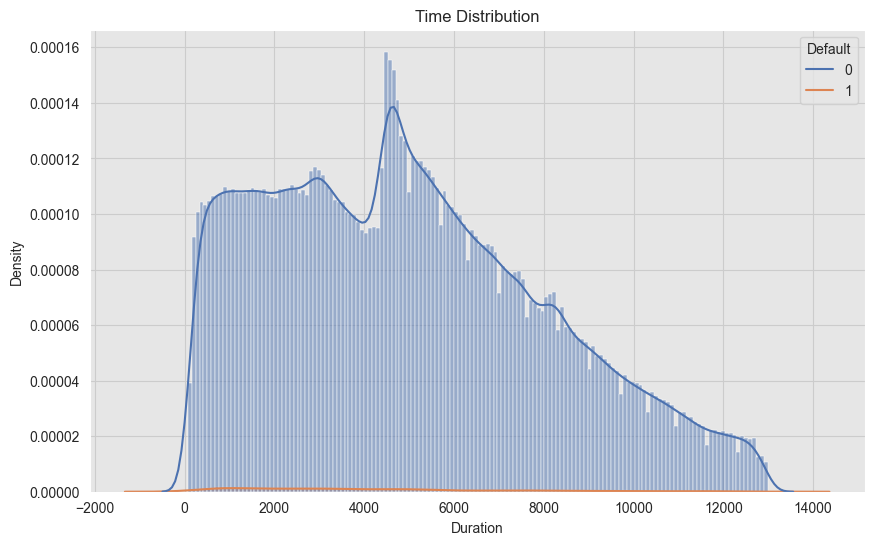

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram with the 'EventType' hue
sns.histplot(data=df, x='Duration', hue='Default', stat='density', ax=ax)

# Create the KDE plot with the 'EventType' hue
sns.kdeplot(data=df, x='Duration', hue='Default', fill=False, ax=ax)

# Set the title
ax.set_title('Time Distribution')

# Show the plot
plt.show()


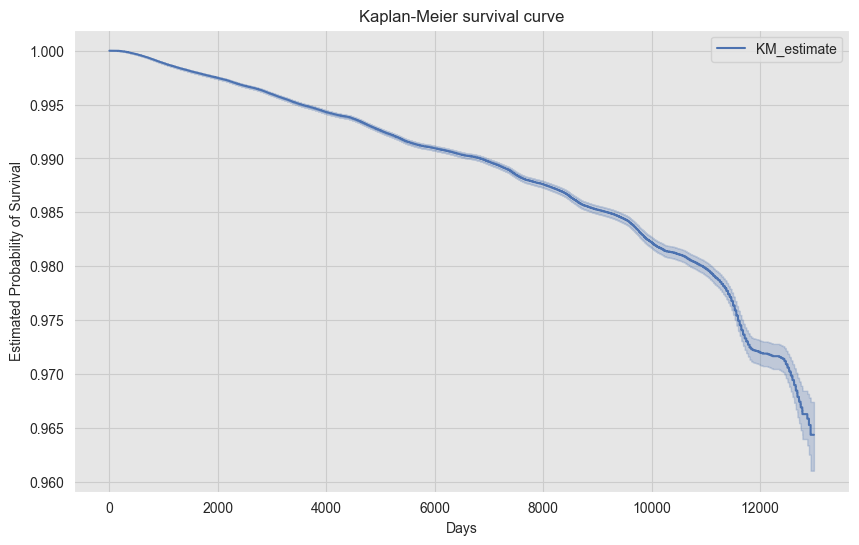

In [40]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['Duration'], event_observed=df['Default'])

fig, ax =  plt.subplots()
kmf.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Days',
    ylabel='Estimated Probability of Survival'
);

In [41]:
df.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic',
       'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital',
       'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets',
       'asset_turnover', 'inventory_turnover', 'days_in_inventory',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio'],
      dtype='object')

C:\Users\Melissa\AppData\Local\Temp\ipykernel_1020\3746533019.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


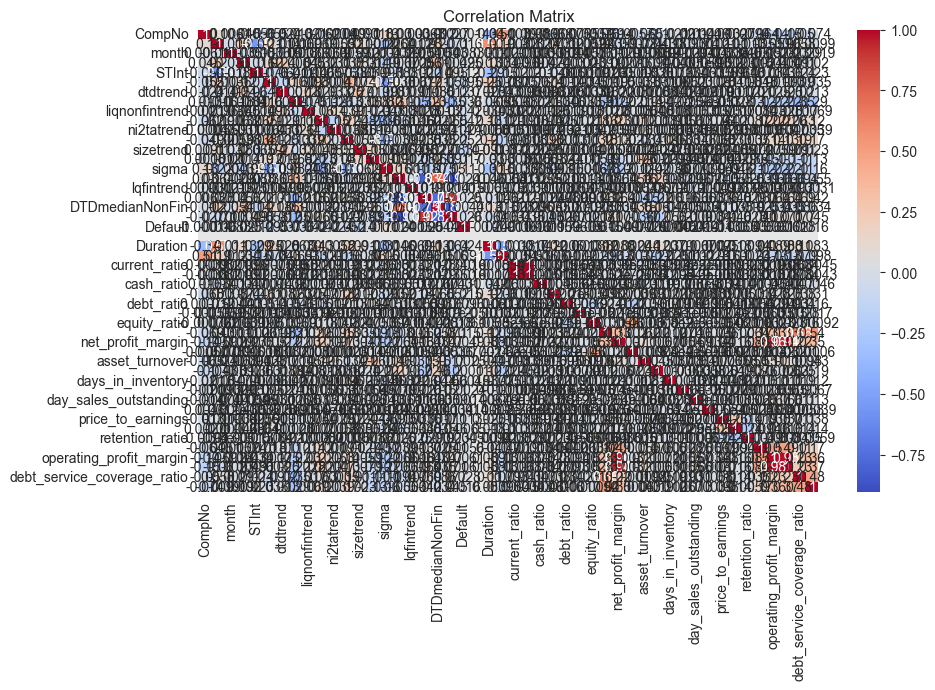

In [42]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [43]:
# Print pairs of features with correlations above 0.9
threshold = 0.9
correlation_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            correlation_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

if correlation_pairs:
    print("Correlations above 0.9:")
    for col1, col2, corr in correlation_pairs:
        print(f"Columns {col1} and {col2} have a correlation of {corr}")
else:
    print("No correlations above 0.9 found.")


Correlations above 0.9:
Columns liqfinlevel and dummy297fin have a correlation of -0.9021106179699264
Columns DTDmedianFin and dummy297fin have a correlation of 0.9157427576696173
Columns dummy297fin and liqfinlevel have a correlation of -0.9021106179699264
Columns dummy297fin and DTDmedianFin have a correlation of 0.9157427576696173
Columns current_ratio and quick_ratio have a correlation of 0.9999952803367784
Columns quick_ratio and current_ratio have a correlation of 0.9999952803367784
Columns net_profit_margin and operating_profit_margin have a correlation of 0.9624937510060279
Columns net_profit_margin and ebitda_margin have a correlation of 0.9439431533199736
Columns operating_profit_margin and net_profit_margin have a correlation of 0.9624937510060279
Columns operating_profit_margin and ebitda_margin have a correlation of 0.9799710236599709
Columns ebitda_margin and net_profit_margin have a correlation of 0.9439431533199736
Columns ebitda_margin and operating_profit_margin have 

In [44]:
df.drop(["quick_ratio", "operating_profit_margin", "ebitda_margin", "dummy297fin"], axis=1, inplace=True)


In [45]:
correlation_matrix = df.corr()
threshold = 0.9
correlation_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            correlation_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

if correlation_pairs:
    print("Correlations above 0.9:")
    for col1, col2, corr in correlation_pairs:
        print(f"Columns {col1} and {col2} have a correlation of {corr}")
else:
    print("No correlations above 0.9 found.")

C:\Users\Melissa\AppData\Local\Temp\ipykernel_1020\2549217585.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


No correlations above 0.9 found.


In [46]:

# selected_features = ['CompNo','StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
#        'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
#        'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'date',
#        'DTDmedianFin', 
#        #'DTDmedianNonFin', 'dummy297fin',
#        'current_ratio',
#        # 'quick_ratio', 
#        'cash_ratio', 'net_working_capital', 'debt_ratio', 'Duration', 'Default',
#        'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio',
#        'net_profit_margin', 'return_on_assets', 'asset_turnover',
#        'inventory_turnover', 'days_in_inventory', 'receivables_turnover',
#        'day_sales_outstanding', 'working_capital_turnover',
#        'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio',
#        'gross_margin_ratio', 
#        #'operating_profit_margin', 'ebitda_margin',
#        'debt_service_coverage_ratio', 'interest_coverage_ratio']


# df = df[selected_features]

# df.describe()



In [47]:
from datetime import datetime

date2022 = datetime(2022, 1, 1)
train_df = df[df["date"] < date2022]
test_df = df[df["date"] >= date2022]
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)

train_df shape: (1142877, 48)
test_df shape: (36537, 48)


In [48]:
test_df.groupby('Default')["CompNo"].count()

Default
0    36381
1      156
Name: CompNo, dtype: int64

In [49]:
156/(35490+156)

0.00437636761487965

In [50]:
# percentile_40 = train_df['DaysDuration'].quantile(0.4)
val_date = datetime(2020, 1, 1)

val_df = train_df[train_df["date"] >= val_date]
train_df = train_df[train_df["date"] < val_date]
print("train_df shape:", train_df.shape)
print("val_df shape:", val_df.shape)

train_df shape: (1084578, 48)
val_df shape: (58299, 48)


In [51]:
train_df.groupby("Default")["CompNo"].count()

Default
0    1075728
1       8850
Name: CompNo, dtype: int64

In [52]:
8554/(1044800+8554+14)

0.008120618815076973

In [53]:
val_df.groupby('Default')["CompNo"].count()

Default
0    57983
1      316
Name: CompNo, dtype: int64

In [54]:
301/(57118+301)

0.005242167226876121

In [55]:
print(train_df.columns)

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'Default', 'day', 'date',
       'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic', 'current_ratio',
       'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio',
       'net_profit_margin', 'return_on_assets', 'asset_turnover',
       'inventory_turnover', 'days_in_inventory', 'receivables_turnover',
       'day_sales_outstanding', 'working_capital_turnover',
       'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio',
       'gross_margin_ratio', 'debt_service_coverage_ratio',
       'interest_coverage_ratio'],
      dtype='object')


In [56]:
train_df.drop(["CompNo", "year", "month", "gvkey", "date", "StartDate", "EventDate", "tic"], axis=1, inplace=True)
val_df.drop(["CompNo", "year", "month", "gvkey", "date", "StartDate", "EventDate", "tic"], axis=1, inplace=True)
test_df.drop(["CompNo", "year", "month", "gvkey", "date", "StartDate", "EventDate", "tic"], axis=1, inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_1020\2307308159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(["CompNo", "year", "month", "gvkey", "date", "StartDate", "EventDate", "tic"], axis=1, inplace=True)


In [57]:
train_df.head()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,days_in_inventory,receivables_turnover,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,debt_service_coverage_ratio,interest_coverage_ratio
0,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,0.079108,-5.559146,1.222586,...,1346.485000,0.000000,197946.597222,0.000000,-5.000000,-0.000000,1.000000,-5.251700e+06,-149041.103448,-297211.000000
4660,0.089239,0.011089,3.716702,1.502089,1.217818,0.072036,0.008587,0.003279,0.078343,0.757379,...,4230.537124,4.077284,89.520382,0.160714,175.431034,0.000000,1.000000,4.503131e+01,-149041.103448,-0.776226
4659,0.089239,0.011089,2.721204,0.118883,2.260250,-0.057290,0.011613,-0.010765,-1.101563,0.635338,...,5810.609860,1.073803,339.913431,0.173655,46.875000,0.000000,1.000000,5.538300e+01,-0.369007,-2.958753
4658,0.089239,0.011089,2.951064,-0.037748,0.603877,0.020419,0.008892,0.003140,-2.389226,-0.157686,...,7937.740426,0.680485,536.381872,0.950565,-26.893939,-1.954545,2.954545,3.994056e+01,-0.604898,-0.290000
4657,0.089239,0.011089,2.692160,1.016634,0.976345,0.781513,0.011998,-0.008336,-0.798139,-0.171643,...,3232.987500,0.743889,490.664365,0.374972,178.125000,0.000000,1.000000,3.530126e+01,-1.081539,2.392157


In [58]:
train_X = train_df
train_X.dropna(inplace=True)
val_X = val_df
val_X.dropna(inplace=True)
test_X = test_df
test_X.dropna(inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_1020\890013741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X.dropna(inplace=True)


In [59]:
train_X.head()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,days_in_inventory,receivables_turnover,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,debt_service_coverage_ratio,interest_coverage_ratio
0,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,0.079108,-5.559146,1.222586,...,1346.485000,0.000000,197946.597222,0.000000,-5.000000,-0.000000,1.000000,-5.251700e+06,-149041.103448,-297211.000000
4660,0.089239,0.011089,3.716702,1.502089,1.217818,0.072036,0.008587,0.003279,0.078343,0.757379,...,4230.537124,4.077284,89.520382,0.160714,175.431034,0.000000,1.000000,4.503131e+01,-149041.103448,-0.776226
4659,0.089239,0.011089,2.721204,0.118883,2.260250,-0.057290,0.011613,-0.010765,-1.101563,0.635338,...,5810.609860,1.073803,339.913431,0.173655,46.875000,0.000000,1.000000,5.538300e+01,-0.369007,-2.958753
4658,0.089239,0.011089,2.951064,-0.037748,0.603877,0.020419,0.008892,0.003140,-2.389226,-0.157686,...,7937.740426,0.680485,536.381872,0.950565,-26.893939,-1.954545,2.954545,3.994056e+01,-0.604898,-0.290000
4657,0.089239,0.011089,2.692160,1.016634,0.976345,0.781513,0.011998,-0.008336,-0.798139,-0.171643,...,3232.987500,0.743889,490.664365,0.374972,178.125000,0.000000,1.000000,3.530126e+01,-1.081539,2.392157


In [60]:
print(train_X['Default'].dtype)
print(train_X['Duration'].dtype)

int64
float64


In [61]:
print(df.select_dtypes(include='datetime64'))


              date  StartDate  EventDate
0       2000-01-01 1997-07-31 2000-01-31
4660    2000-01-01 1995-06-09 2000-01-31
4659    2000-01-01 1992-06-15 2000-01-31
4658    2000-01-01 1992-06-15 2000-01-31
4657    2000-01-01 1995-02-07 2000-01-31
...            ...        ...        ...
1179381 2023-07-01 1988-01-04 2023-07-31
1179382 2023-07-01 1995-11-21 2023-07-31
1179383 2023-07-01 1988-01-04 2023-07-31
1179371 2023-07-01 1993-03-24 2023-07-31
1179413 2023-07-01 1988-01-04 2023-07-31

[1179414 rows x 3 columns]


In [62]:
nan_count = df.isna().sum().sum()

print(nan_count)

0


In [63]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Select only the numeric columns if necessary (VIF is not applicable to non-numeric columns)
numeric_columns = df.select_dtypes(include=[pd.np.number])

# Calculate VIF for the numeric columns
vif_result = calculate_vif(train_X)

# Convert the VIF result DataFrame to a list of lists
vif_result_list = vif_result.values.tolist()

print(vif_result_list)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_1020\304942090.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  numeric_columns = df.select_dtypes(include=[pd.np.number])


[['StkIndx', 1.6822322350411323], ['STInt', 1.2001039706822427], ['dtdlevel', 1.933711317866553], ['dtdtrend', 1.2367872274482727], ['liqnonfinlevel', 1.4418286391637187], ['liqnonfintrend', 1.059618896676572], ['ni2talevel', 1.3615242531343683], ['ni2tatrend', 1.0785814762602202], ['sizelevel', 1.7532731160852388], ['sizetrend', 1.1723518041687362], ['m2b', 1.3031526318671343], ['sigma', 2.3212543999366493], ['liqfinlevel', 3.8631012772537527], ['lqfintrend', 1.0039449992493397], ['DTDmedianFin', 5.182060810764442], ['DTDmedianNonFin', 5.348742767450507], ['Default', 1.03699986295178], ['day', 39.88678432365191], ['Duration', 1.3094153657234877], ['current_ratio', 1.0023351391832134], ['cash_ratio', 1.0014900882864728], ['net_working_capital', 1.0744605272614405], ['debt_ratio', 1.0705885018748134], ['debt_to_equity_ratio', 1.0000424090222617], ['equity_ratio', 1.2752158456274494], ['cashflow_to_debt_ratio', 2.125366220705918], ['net_profit_margin', 1.6052148832328879], ['return_on_as

In [64]:
print(train_X.columns)

Index(['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin',
       'DTDmedianNonFin', 'Default', 'day', 'Duration', 'current_ratio',
       'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio',
       'net_profit_margin', 'return_on_assets', 'asset_turnover',
       'inventory_turnover', 'days_in_inventory', 'receivables_turnover',
       'day_sales_outstanding', 'working_capital_turnover',
       'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio',
       'gross_margin_ratio', 'debt_service_coverage_ratio',
       'interest_coverage_ratio'],
      dtype='object')


In [66]:
# # Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()   
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

cph = CoxPHFitter(penalizer=0.5, l1_ratio=1.0)
cph.fit(train_X, 'Duration', event_col='Default', fit_options={'step_size': 0.05})

available_keys = cph.baseline_hazard_['baseline hazard'].keys()
print("Available keys in 'baseline hazard' dictionary:", available_keys)

# baseline_haz = cph.baseline_hazard_['baseline hazard'][12.0]

c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['STInt', 'day'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model

In [ ]:
print(df["Duration"].astype)

# negative_duration = df[df['Duration'] < 0]
# print(negative_duration)


print(df["Default"].unique())


<bound method NDFrame.astype of 0            914.0
1           1848.0
2           3785.0
3           2786.0
4            472.0
            ...   
1179409    12992.0
1179410    12991.0
1179411    12992.0
1179412    12992.0
1179413    12992.0
Name: Duration, Length: 1179414, dtype: float64>
[0 1]


In [ ]:
# Calculate the sparsity of your DataFrame
sparsity = 1.0 - np.count_nonzero(df) / df.size
print("Sparsity:", sparsity)

Sparsity: 0.1239787654434038


In [67]:
# Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2]
# step_size = [0.01, 0.05, 0.1]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

for s in step_size:
    for p in penalizer:
        for l in l1_ratio:
            if l == 0:
                if p == 0:
                    cph = CoxPHFitter()
                else:
                    cph = CoxPHFitter(penalizer=p)
            else:
                cph = CoxPHFitter(penalizer=p, l1_ratio=l)

            cph.fit(train_X, 'Duration', event_col='Default', fit_options={'step_size': s})

            baseline_haz = cph.baseline_hazard_['baseline hazard'][71.0]
            x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
            x_pred = np.transpose(x_pred)
            train_auc.append(roc_auc_score(train_df['Default'], x_pred))
            val_x_pred = np.array(cph.predict_partial_hazard(val_X)) * baseline_haz
            val_x_pred = np.transpose(val_x_pred)
            val_auc.append(roc_auc_score(val_df['Default'], val_x_pred))

            cph_list.append({'cph': cph, 'step_size': s, 'penalizer': p, 'l1_ratio': l})
            

c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['STInt', 'day'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model

In [ ]:
m = max(train_auc)
print(m)
[i for i, j in enumerate(train_auc) if j == m]

0.5


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [ ]:
m = max(val_auc)
print(m)
[i for i, j in enumerate(val_auc) if j == m]

0.5


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [ ]:
cph_list[16]

{'cph': <lifelines.CoxPHFitter: fitted with 1.05335e+06 total observations, 1.0448e+06 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 0}

In [ ]:
cph_list[17]

{'cph': <lifelines.CoxPHFitter: fitted with 1.05335e+06 total observations, 1.0448e+06 right-censored observations>,
 'step_size': 0.1,
 'penalizer': 0,
 'l1_ratio': 1.0}

In [ ]:
cph.print_summary()


AttributeError: Must call `fit` first.

In [ ]:
x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
x_pred = np.transpose(x_pred)
x_pred.shape

(1053354,)

In [ ]:
roc_auc_score(train_df['Default'], x_pred)

0.5

In [ ]:
baseline_haz = cph.baseline_hazard_['baseline hazard'][5201.0]
test_x_pred = np.array(cph.predict_partial_hazard(test_X)) * baseline_haz
test_x_pred = np.transpose(test_x_pred)
test_x_pred.shape

(35646,)

In [ ]:
print(test_x_pred.min())
print(test_x_pred.max())


0.0
0.0


In [ ]:
roc_auc_score(test_df['Default'], test_x_pred)


0.5

In [71]:
datetime_columns = df.select_dtypes(include=['datetime64', 'datetime64[ns]']).columns
for col in datetime_columns:
    df[col] = df[col].apply(lambda x: x.timestamp())

Index(['date', 'StartDate', 'EventDate'], dtype='object')


In [73]:
df.drop(["CompNo", "year", "month", "gvkey", "date", "StartDate", "EventDate", "tic"], axis=1, inplace=True)


In [74]:
import numpy as np
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation, concordance_index

# Create the Cox PH model
cph = CoxPHFitter()

# Perform k-fold cross-validation and calculate the concordance index for the Cox PH model
cph_cindex = np.mean(k_fold_cross_validation(cph, df, duration_col='Duration', event_col='Default', k=5, scoring_method=concordance_index))

# Print the average concordance index
print("Average Concordance Index (CoxPH):", cph_cindex)


c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['STInt', 'day'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model

AttributeError: Must call `fit` first.

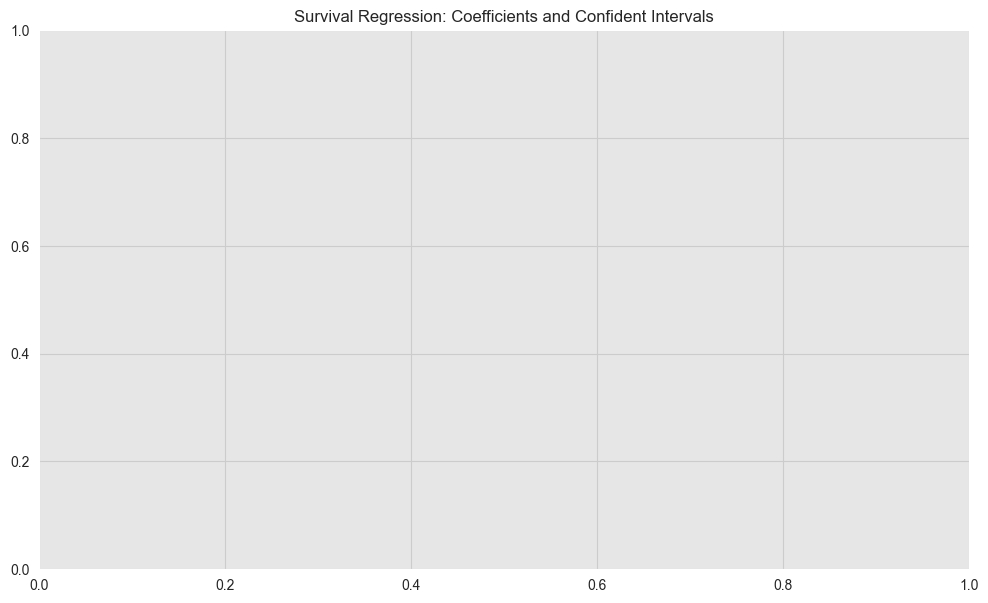

In [ ]:
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);